# Instrumental Variables and Regression Discontinuity

In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Instrumental Variables

In [3]:
# Z - instrument
# W1 - confounder
# W2 - confounder
# X - treatment
# Y - outcome

In [8]:
num = 100000
np.random.seed(0)
Z = np.random.binomial(1, 0.3, (num,))
W1 = np.random.normal(0, 1, (num,))
W2 = np.random.normal(0, 1, (num,))
epsilon_X = np.random.normal(0, 1, (num,))
X = 2 * Z + W1 - W2 + epsilon_X
epsilon_Y = np.random.normal(0, 1, (num,))
Y = 3.2 * X - 1.7 * W1 + W2 + X * W1 + epsilon_Y

In [11]:
test_df = pd.DataFrame({"X": X, "Z": Z})
results = sm.OLS(Y, sm.add_constant(test_df)).fit()
results.params

const    1.000626
X        2.521248
Z        1.347020
dtype: float64

In [18]:
num = 100000
np.random.seed(0)
Z = np.random.binomial(1, 0.3, (num,))
W1 = np.random.normal(0, 1, (num,))
W2 = np.random.normal(0, 1, (num,))
epsilon_X = np.random.normal(0, 1, (num,))
X = 2 * Z + W1 - W2 + epsilon_X
epsilon_Y = np.random.normal(0, 1, (num,))
Y = 3.2 * X - 1.7 * W1 + W2 + X * W1 + epsilon_Y # true effect is 3.2
df = pd.DataFrame({"X": X, "Y": Y, "Z": Z, "W1": W1, "W2": W2})

In [22]:
df_with_interaction = pd.DataFrame({"X": X, "Y": Y, "Z": Z, "W1": W1, "W2": W2, "X_W1": X * W1})
results = sm.OLS(Y, sm.add_constant(df_with_interaction.drop(columns = ["Y"]))).fit()
results.params

const    0.007268
X        3.199576
Z       -0.015148
W1      -1.697495
W2       0.993987
X_W1     1.001056
dtype: float64

In [12]:
df_bin = df.copy() # df[(df.W1 > 0.4) & (df.W1 < 0.6) & (df.W2 > -0.3) & (df.W2 < -0.1)]

NameError: name 'df' is not defined

In [22]:
y_diff = df[df.Z == 1].Y.mean() - df[df.Z == 0].Y.mean()
x_diff = df[df.Z == 1].X.mean() - df[df.Z == 0].X.mean()
y_diff / x_diff

3.1904479752541985

In [23]:
df_bin = df[(df.W1 > 0.4) & (df.W1 < 0.6) & (df.W2 > -0.3) & (df.W2 < -0.1)]
#df_bin = df.copy()
(df_bin[df_bin.Z == 1].Y.mean() - df_bin[df_bin.Z == 0].Y.mean()) / (df_bin[df_bin.Z == 1].X.mean() - df_bin[df_bin.Z == 0].X.mean())

3.6661641514440033

In [9]:
num = 100000
np.random.seed(0)
Z = np.random.binomial(1, 0.3, (num,))
W1 = np.random.normal(0, 1, (num,))
W2 = np.random.normal(0, 1, (num,))
epsilon_X = np.random.normal(0, 1, (num,))
X = 2 * Z + W1 - W2 + epsilon_X
epsilon_Y = np.random.normal(0, 1, (num,))
Y = 3.2 * X - 1.7 * W1 + W1 * X + epsilon_Y # true effect is 3.2
df = pd.DataFrame({"X": X, "Y": Y, "Z": Z, "W1": W1, "W2": W2})

# Y average at Z = 1 minus Z = 0
Y_diff = df[df.Z == 1].Y.mean() - df[df.Z == 0].Y.mean()
X_diff = df[df.Z == 1].X.mean() - df[df.Z == 0].X.mean()
Y_diff / X_diff

3.1949660524467727

### Does it work when Z influences Y directly?

In [24]:
Y = 3.2 * X - 1.7 * W1 - 2 * Z + epsilon_Y # true effect is 3.2
df = pd.DataFrame({"X": X, "Y": Y, "Z": Z, "W1": W1, "W2": W2})

# Y average at Z = 1 minus Z = 0
Y_diff = df[df.Z == 1].Y.mean() - df[df.Z == 0].Y.mean()
X_diff = df[df.Z == 1].X.mean() - df[df.Z == 0].X.mean()
Y_diff / X_diff

2.197356441250059

### Does it work when Z influences W?

In [11]:
Z = np.random.binomial(1, 0.3, (num,))
W1 = 2 * Z + np.random.normal(0, 1, (num,))
W2 = np.random.normal(0, 1, (num,))
epsilon_X = np.random.normal(0, 1, (num,))
X = 2 * Z + W1 - W2 + epsilon_X
epsilon_Y = np.random.normal(0, 1, (num,))
Y = 3.2 * X - 1.7 * W1 + epsilon_Y # true effect is 3.2
df = pd.DataFrame({"X": X, "Y": Y, "Z": Z, "W1": W1, "W2": W2})

# Y average at Z = 1 minus Z = 0
Y_diff = df[df.Z == 1].Y.mean() - df[df.Z == 0].Y.mean()
X_diff = df[df.Z == 1].X.mean() - df[df.Z == 0].X.mean()
Y_diff / X_diff

2.349474884470536

### Regression Discontinuity

In [26]:
np.random.seed(0)
num = 100000
X_running = np.random.uniform(-1, 1, num)
X_above_cutoff = 1 * (X_running >= 0)
epsilon_Y = np.random.normal(0, 1, num)
Y = 2.8 * X_above_cutoff + 0.5 * X_running + epsilon_Y # true effect is 2.8

(array([ 0.09762701,  0.43037873,  0.20552675, ...,  0.62026567,
         0.10206456, -0.54848829]),
 array([1, 1, 1, ..., 1, 1, 0]))

In [27]:
np.random.seed(0)
num = 100000
# Note: X_above_cutoff and X_running are both the treatment, sort of.
# But X_above_cutoff is the real treatment in that its coefficient is the effect.
X_running = np.random.uniform(-1, 1, num)
X_above_cutoff = 1 * (X_running >= 0)
epsilon_Y = np.random.normal(0, 1, num)
Y = 2.8 * X_above_cutoff + 0.5 * X_running + epsilon_Y # true effect is 2.8

# Create DataFrame
df = pd.DataFrame({'running': X_running, 'above_cutoff': X_above_cutoff, 'Y': Y})

model = smf.ols('Y ~ running + above_cutoff', data=df).fit()
print(model.params)

Intercept       0.018988
running         0.516870
above_cutoff    2.782920
dtype: float64


### What if there's a confounder?

In [28]:
np.random.seed(0)
num = 1000000
# Note: X_above_cutoff and X_running are both the treatment, sort of.
# But X_above_cutoff is the real treatment in that its coefficient is the effect.
W = np.random.uniform(-1, 1, num)
X_running = np.random.uniform(-1, 1, num) + 2 * W
X_above_cutoff = 1 * (X_running >= 0)
Y = 1.2 * X_above_cutoff + 0.5 * X_running - 2 * W + np.random.normal(0, 1, num)  # true effect is 2.8

# Create DataFrame
df = pd.DataFrame({'running': X_running, 'above_cutoff': X_above_cutoff, 'W': W, 'Y': Y})

model = smf.ols('Y ~ running + above_cutoff', data=df).fit()
print(model.params)

Intercept       0.167738
running        -0.190323
above_cutoff    0.861740
dtype: float64


### Solution: Just go slightly above and below the cutoff

In [29]:
np.random.seed(0)
num = 10000000
# Note: X_above_cutoff and X_running are both the treatment, sort of.
# But X_above_cutoff is the real treatment in that its coefficient is the effect.
W = np.random.uniform(-1, 1, num)
X_running = np.random.uniform(-1, 1, num) + 2 * W
X_above_cutoff = 1 * (X_running >= 0)
Y = 1.2 * X_above_cutoff + 0.5 * X_running - 2 * W + np.random.normal(0, 1, num)  # true effect is 1.2

# Create DataFrame
df = pd.DataFrame({'running': X_running, 'above_cutoff': X_above_cutoff, 'Y': Y})

df_limited = df[(df.running > -0.1) & (df.running < 0.1)]

# Does not get running variable parameter right, but it still helps to control for it!
model = smf.ols('Y ~ running + above_cutoff', data=df_limited).fit()
print(model.params)

Intercept       0.006807
running        -0.393145
above_cutoff    1.184976
dtype: float64


In [30]:
# Without controlling for running variable
df2 = pd.DataFrame({'running': X_running, 'above_cutoff': X_above_cutoff, 'Y': Y})

df_limited = df[(df.running > -0.1) & (df.running < 0.1)]

model = smf.ols('Y ~ above_cutoff', data=df_limited).fit()
print(model.params)

Intercept       0.026439
above_cutoff    1.145635
dtype: float64


(array([ 1.,  2.,  7., 12., 14., 21., 16., 13.,  8.,  6.]),
 array([1.14104544, 1.1425829 , 1.14412036, 1.14565782, 1.14719528,
        1.14873274, 1.15027019, 1.15180765, 1.15334511, 1.15488257,
        1.15642003]),
 <BarContainer object of 10 artists>)

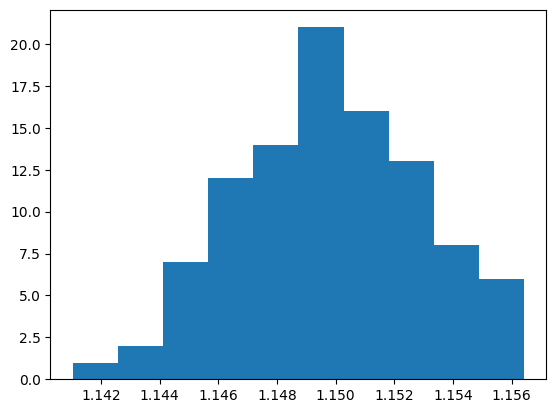

In [39]:
lst = list()
for n in range(100):
    num = 10000000
    # Note: X_above_cutoff and X_running are both the treatment, sort of.
    # But X_above_cutoff is the real treatment in that its coefficient is the effect.
    W = np.random.uniform(-1, 1, num)
    X_running = np.random.uniform(-1, 1, num) + 2 * W
    X_above_cutoff = 1 * (X_running >= 0)
    Y = 1.2 * X_above_cutoff + 0.5 * X_running - 2 * W + np.random.normal(0, 1, num)  # true effect is 1.2

    df2 = pd.DataFrame({'running': X_running, 'above_cutoff': X_above_cutoff, 'Y': Y})
    
    df_limited2 = df2[(df2.running > -0.1) & (df2.running < 0.1)]
    
    model = smf.ols('Y ~ above_cutoff', data=df_limited2).fit()
    lst.append(model.params.above_cutoff)
plt.hist(lst)

(array([ 1.,  2.,  7., 12., 14., 21., 16., 13.,  8.,  6.]),
 array([1.14104544, 1.1425829 , 1.14412036, 1.14565782, 1.14719528,
        1.14873274, 1.15027019, 1.15180765, 1.15334511, 1.15488257,
        1.15642003]),
 <BarContainer object of 10 artists>)

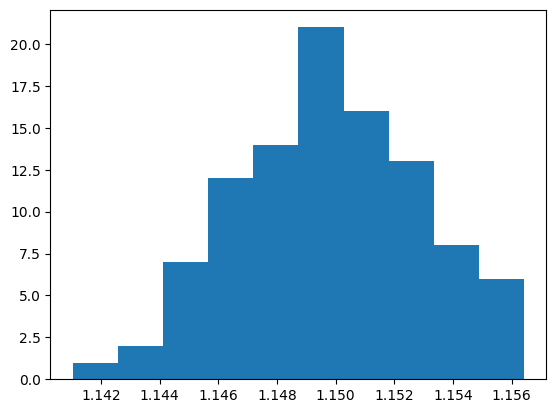

In [19]:
plt.hist(lst)